In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline



In [2]:
Q = 2.4578e6
Te = np.arange(0, Q, 1000)
c = 3e8   #speed of light
Q = 2.4578e6
Z = 54    #atomic number of TPC medium
A = 131   #atomic mass of TPC medium
z = 1     #charge of the particle
re =2.8e-13   #radius of electron in meters
me = 511e3/(c**2)    # mass of electron in eV
M = 938e6/(c**2)     # mass of Proton
M2 = 3.72e9/(c**2)  # mass of alpha
M3 = 105e6/(c**2)   # mass of muon
Na = 6.02e23    # avagrado number mol-1


def N(t):
    return (1/c**5)*(t**2+2*t*me*c**2)**(1/2)*(Q-Te)**2*(Te+me*c**2)

def D(E):
    return E*(Q-E)**5*(1+2*E+4/3*E**2+1/3*E**3+1/30*E**4)

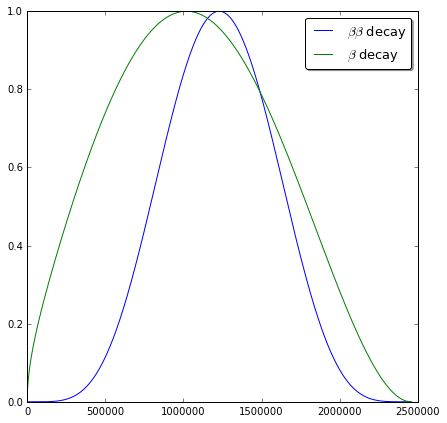

In [3]:
plt.figure(figsize=(7,7))
plt.plot(Te,D(Te)/max(D(Te)),label=r'$\beta \beta$ decay')
plt.plot(Te,N(Te)/max(N(Te)),label=r'$ \beta$ decay')
plt.legend(loc='upper right',fontsize=13,shadow=True, fancybox=True)

#plt.xlim(2.3e6,2.6e6)
plt.show()

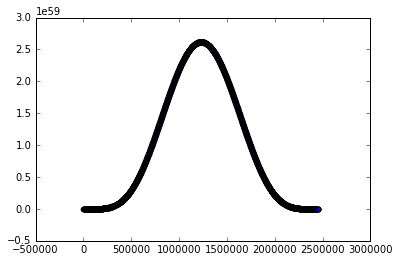

In [4]:
plt.scatter(Te,D(Te))
#plt.xlim(2.3e6,2.6e6)
plt.show()

In [5]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/(sig*np.sqrt(2*3.142))
def D(E):
    A = E*(Q-E)**5*(1+2*E+4/3*E**2+1/3*E**3+1/30*E**4)
    return A/sum(A)*100000
def D2(E):
    E = E+250e3
    A = E*(Q-E)**5*(1+2*E+4/3*E**2+1/3*E**3+1/30*E**4)
    A[A<0] = 0
    return A/sum(A)*100000

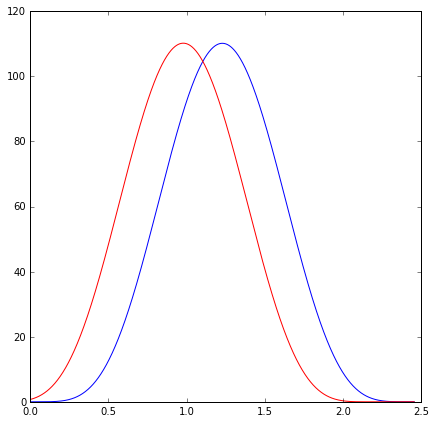

In [6]:
plt.figure(figsize=(7,7))
plt.plot(Te/1e6,D(Te))#/max(D(Te)))
#plt.plot(Te,gaussianNor(Te,1.3e6,50e3))
#QW = D(Te)/max(D(Te)) - gaussianNor(Te,1.3e6,50e3)
#A = D2(Te)
#A[A<0] = 0
plt.plot(Te/1e6,D2(Te),color='r')
#plt.xlim(0.6,2.8)
plt.show()

In [7]:
testBin = np.linspace(0, 2.5e6,endpoint=True, num=101)
testBin[2] - testBin[1]

25000.0

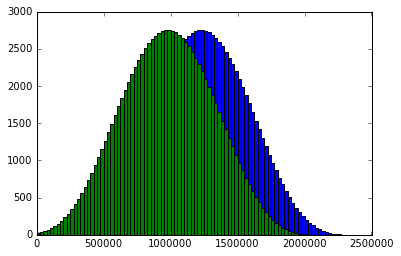

In [8]:
plt.hist(Te,bins=testBin,weights=D(Te))
plt.hist(Te,bins=testBin,weights=D2(Te))

plt.show()

In [9]:
# find the resolution function
Prcnt = np.array([6.75, 5.51, 2.35, 0.7])
Enrgy = np.array([29.6e3, 41.5e3, 511e3, 2.45e6])
DeltaE= Prcnt*Enrgy/100
SIGMAS= DeltaE/2.355

In [10]:
testBin = np.linspace(0, 2.5e6,endpoint=True, num=101)

hist, bin_edges = np.histogram(Te,weights=D(Te),bins=testBin)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

7.13324927415


//anaconda/envs/py35/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


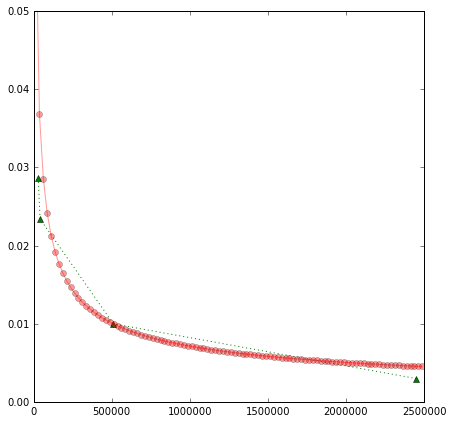

In [17]:
x = Enrgy[2:4]
y = (SIGMAS/Enrgy)[2:4]

x = Enrgy[2:3]
y = (SIGMAS/Enrgy)[2:3]
def srt(t,b):
    return b/np.sqrt(t)
popt,pcov =curve_fit(srt,  x,  y)
plt.figure(figsize=(7,7))
plt.plot(Enrgy,(SIGMAS/Enrgy),'g^:',label='data')
#plt.plot(x,srt())
plt.plot(bin_centres,srt(bin_centres,*popt),'r',label='fit',marker='o',alpha=0.4)
plt.ylim(0,0.05)

print(popt[0])
plt.show()

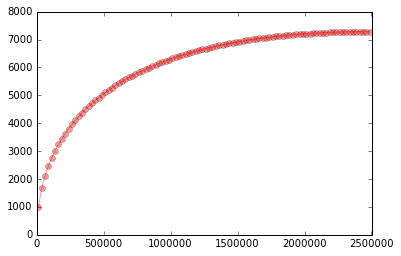

In [248]:
plt.plot(bin_centres,srt(bin_centres,*popt)*bin_centres,'r',label='fit',marker='o',alpha=0.4)
plt.show()

In [249]:
NewSigma = srt(bin_centres,*popt)*bin_centres

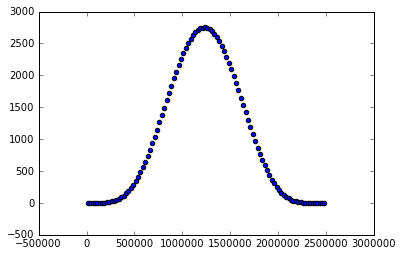

In [250]:
plt.scatter(bin_centres,hist)
#plt.xlim(500e3,700e3)

In [254]:
Smeared = np.array([])
for q in range(0,len(bin_centres)):
    mu = bin_centres[q]
    sigma = NewSigma[q]#srt(bin_centres[q],*popt)*bin_centres[q]
    Height = hist[q]
    smrd = np.random.normal(mu, sigma, Height)
    Smeared = np.append(Smeared,smrd)

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [255]:
Smeared

array([  143458.55450266,   162180.95985889,   160751.72751477, ...,
        2282723.23376427,  2284396.56667262,  2296676.68966409])

In [256]:
histS, bin_edgesS = np.histogram(Smeared,bins=testBin)
bin_centresS = (bin_edgesS[:-1] + bin_edgesS[1:])/2

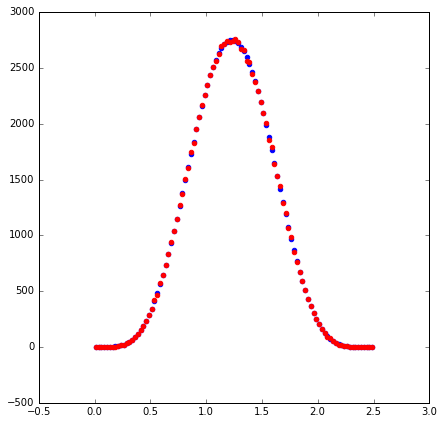

In [257]:
plt.figure(figsize=(7,7))
plt.scatter(bin_centres/1e6,hist,color='b')
plt.scatter(bin_centresS/1e6,histS,color='r')
#plt.xlim(2.3e6,2.6e6)
#plt.semilogy()
#plt.hist(Smeared,bins=testBin)
plt.show()

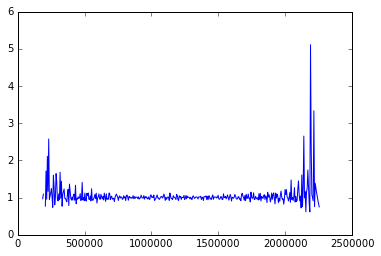

In [235]:
plt.plot(bin_centres,hist/histS,color='b')


In [186]:
print('mu = ',mu)
print('sig = ',sigma)
print('H = ',Height)

mu =  512500.0
sig =  5104.43991385
H =  0.0269080899551


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


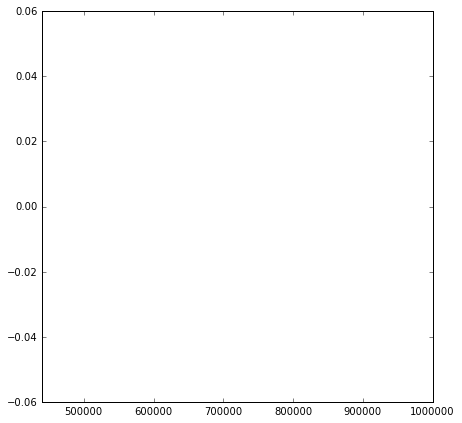

In [185]:
F=20
mu = bin_centres[F]
sigma = NewSigma[F]#srt(bin_centres[q],*popt)*bin_centres[q]
Height = hist[F]/(np.sqrt(2*np.pi)*sigma)
smrd = np.random.normal(mu, sigma, Height)

plt.figure(figsize=(7,7))
plt.hist(smrd)
#plt.scatter(bin_centres,hist,color='k')
plt.xlim(440e3,1e6)
plt.show()

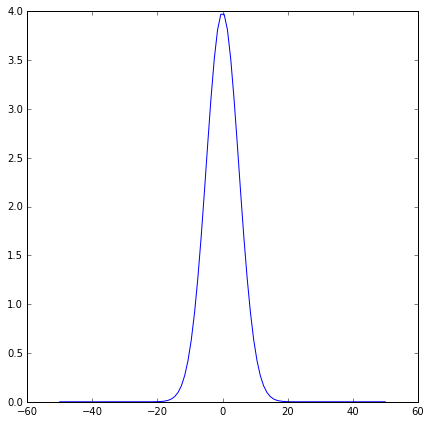

49.996758755460505

In [165]:
plt.figure(figsize=(7,7))
Testx = np.linspace(-50,50,100)
Testy = gaussian(Testx,0,5)
plt.plot(Testx,Testy*50)
plt.show()
dx=Testx[2]-Testx[1]
sum(Testy*50)*dx

In [174]:
(np.sqrt(2*np.pi)*4)*5

50.132565492620003

In [95]:
qq = np.where(ffit == max(ffit))[0][0]
Te[qq]

2457000.0

In [96]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/(sig*np.sqrt(2*3.142))

In [97]:
len(Te)

2458

In [314]:
QWE = np.linspace(1,3e6,30)

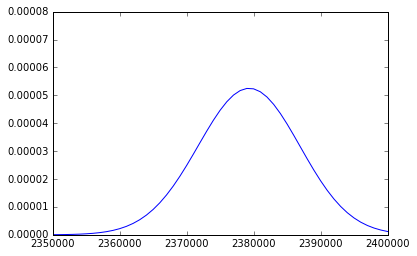

In [318]:
for a in range(0,len(QWE)):
    plt.plot(Te,gaussian(Te,QWE[a],ffit),color='b')
plt.ylim(0,0.00008)
plt.xlim(2.35e6,2.4e6)
plt.show()

In [319]:
2370000-2390000

-20000

In [320]:
20000/2.4e6

0.008333333333333333

In [141]:
N = len(Te)
L = min(Te)
R = max(Te)
dx = float(R-L)/N
sigma = 1/2.355
gx = np.arange(-3*sigma, 3*sigma, dx)
#gaussian = np.exp(-(Totx/1e6/sigma)**2/2)
aaa = D(Te)/max(D(Te))
bbb = gaussian(Te,1e6,ffit)/max(gaussian(Te,0,ffit))

result = np.convolve(D(Te), gaussian(Te,1e5,ffit), mode="full")/sum(gaussian(Te,0,ffit))

In [143]:
result

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [221]:
#X=Te  Y=D(Te)
def Con(X,Y,N,ffit):
    L = len(X)
    chunks = L/N
    XX = np.array_split(X,N)
    YY = np.array_split(Y,N)
    FF = np.array_split(ffit,N)
    ANS = np.array([])
    for q in range(1,N-1):
        xs = XX[q]
        ys = YY[q] 
        fs = FF[q]
        M = np.mean(xs)
        result = np.convolve(ys, gaussian(xs,M,fs), mode="full")/sum(gaussian(xs,M,fs))
        ugg = len(result)
        result = result[0:ugg/2+1]
        ANS = np.append(ANS,result)
    return ANS

In [275]:
#X=Te  Y=D(Te)
def Con(X,Y,N,ffit):
    L = len(X)
    chunks = L/N
    XX = np.array_split(X,N)
    YY = np.array_split(Y,N)
    FF = np.array_split(ffit,N)
    ANS = np.array([])
    for q in range(1,N-1):
        L1 = len(XX[q-1])
        L2 = len(XX[q])
        L3 = len(XX[q+1])
        xs = np.append(XX[q-1],XX[q])
        xs = np.append(xs,XX[q+1])
        ys = np.append(YY[q-1],YY[q])
        ys = np.append(ys,YY[q+1])
        fs = np.append(FF[q-1],FF[q])
        fs = np.append(fs,FF[q+1])
        M = np.mean(xs)
        result = np.convolve(ys, gaussian(xs,M,fs), mode="full")/sum(gaussian(xs,M,fs))
        ugg = len(result)
        result = result[2*L1:2*L1+L2+1]
        #result = result[0:ugg/2]
        ANS = np.append(ANS,result)
    return ANS

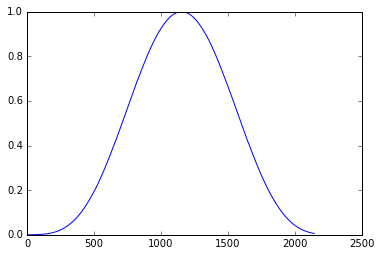

In [276]:
TEE = Con(Te,D(Te)/max(D(Te)),15,ffit)
xx = np.arange(0,len(TEE))
plt.plot(xx,TEE)

In [266]:
N=10
XX = np.array_split(Te,N)
YY = np.array_split(D(Te),N)
FF = np.array_split(ffit,N)
ANS = np.array([])
for q in range(1,N-1):
    L1 = len(XX[q-1])
    L2 = len(XX[q])
    L3 = len(XX[q+1])
    xs = np.append(XX[q-1],XX[q])
    xs = np.append(xs,XX[q+1])
    ys = np.append(YY[q-1],YY[q])
    ys = np.append(ys,YY[q+1])
    fs = np.append(FF[q-1],FF[q])
    fs = np.append(fs,FF[q+1])
    M = np.mean(xs)
    result = np.convolve(ys, gaussian(xs,M,fs), mode="full")/sum(gaussian(xs,M,fs))
    ugg = len(result)
    result = result[2*L1:2*L1+2*L2+1]
    ANS = np.append(ANS,result)


In [267]:
len(result)

491

In [263]:
L1

246

In [259]:
len(xs)

736

In [270]:
len(TEE)

2953

In [253]:
len(Te)

2458

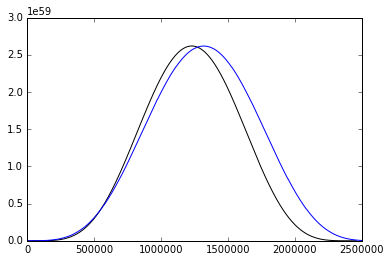

In [307]:
TEE = Con(Te,D(Te),20,ffit)
xxx = testBin = np.linspace(0, 2.5e6,endpoint=True, num=len(TEE))

plt.plot(Te,D(Te),color='k')
plt.plot(xxx,TEE)
#plt.plot(Te,result[0:2458],color='r')
#plt.xlim([2.4e6,2.46e6])
plt.show()

In [24]:
len(Totx)

2478

In [27]:
len(result[0:4955-2477])

2478